In [27]:
import pandas as pd
import matplotlib.pyplot as plt

## Speech Accent Archive

In [15]:
# Load in data

speech_csv = pd.read_csv("./dat11syd/data/kaggle/speakers_all.csv")
countries = pd.read_csv("./dat11syd/data/kaggle/countries.csv")

In [16]:
speech_csv.head()

,age,age_onset,birthplace,filename,native_language,sex,speakerid,country,file_missing?,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,24.0,12.0,"koussi, senegal",balanta,balanta,male,788,senegal,True,NaN,NaN,NaN
1,18.0,10.0,"buea, cameroon",cameroon,cameroon,male,1953,cameroon,True,NaN,NaN,NaN
2,48.0,8.0,"hong, adamawa, nigeria",fulfulde,fulfulde,male,1037,nigeria,True,NaN,NaN,NaN
3,42.0,42.0,"port-au-prince, haiti",haitian,haitian,male,1165,haiti,True,NaN,NaN,NaN
4,40.0,35.0,"port-au-prince, haiti",haitian,haitian,male,1166,haiti,True,NaN,NaN,NaN


In [11]:
countries.head()

,code,country_name,continent,region,surface_area,indep_year,local_name,gov_form,capital,cap_long,cap_lat
0,AFG,Afghanistan,Asia,Southern and Central Asia,652090.0,1919.0,Afganistan/Afqanestan,Islamic Emirate,Kabul,69.17610,34.5228
1,NLD,Netherlands,Europe,Western Europe,41526.0,1581.0,Nederland,Constitutional Monarchy,Amsterdam,4.89095,52.3738
2,ALB,Albania,Europe,Southern Europe,28748.0,1912.0,Shqiperia,Republic,Tirane,19.81720,41.3317
3,DZA,Algeria,Africa,Northern Africa,2381740.0,1962.0,Al-Jazair/Algerie,Republic,Algiers,3.05097,36.7397
4,ASM,American Samoa,Oceania,Polynesia,199.0,NaN,Amerika Samoa,US Territory,Pago Pago,-170.69100,-14.2846


It would be interesting to see the geographical spead of speakers in `speakers.csv` by continent, but `speakers.csv` only contains the speaker's country. The speaker's continent can be added as a new column by mapping country to continent using `countries.csv` columns `country_name` and `continent`.  

In [12]:
# Create countries to continent dictionary

country_list = countries['country_name'].tolist()
continent_list = countries['continent'].tolist()

continent_dict = dict(zip(country_list, continent_list))

continent_dict

{'Afghanistan': 'Asia',
 'Albania': 'Europe',
 'Algeria': 'Africa',
 'American Samoa': 'Oceania',
 'Andorra': 'Europe',
 'Angola': 'Africa',
 'Antigua and Barbuda': 'North America',
 'Argentina': 'South America',
 'Armenia': 'Asia',
 'Aruba': 'North America',
 'Australia': 'Oceania',
 'Austria': 'Europe',
 'Azerbaijan': 'Asia',
 'Bahamas': 'North America',
 'Bahrain': 'Asia',
 'Bangladesh': 'Asia',
 'Barbados': 'North America',
 'Belarus': 'Europe',
 'Belgium': 'Europe',
 'Belize': 'North America',
 'Benin': 'Africa',
 'Bermuda': 'North America',
 'Bhutan': 'Asia',
 'Bolivia': 'South America',
 'Bosnia and Herzegovina': 'Europe',
 'Botswana': 'Africa',
 'Brazil': 'South America',
 'Brunei': 'Asia',
 'Bulgaria': 'Europe',
 'Burkina Faso': 'Africa',
 'Burundi': 'Africa',
 'Cambodia': 'Asia',
 'Cameroon': 'Africa',
 'Canada': 'North America',
 'Cape Verde': 'Africa',
 'Cayman Islands': 'North America',
 'Central African Republic': 'Africa',
 'Chad': 'Africa',
 'Chile': 'South America',
 '

In [107]:
continent_dict['United Kingdom']

'Europe'

In [108]:
# Change country speakers.csv to title case to help dict matching

speech_csv['country'] = speech_csv['country'].str.title()

# Replace Usa and Uk with United States and United Kingdom respectively

speech_csv['country'] = speech_csv['country'].str.replace("Usa", "United States")
speech_csv['country'] = speech_csv['country'].str.replace("Uk", "United Kingdom")
speech_csv['country'] = speech_csv['country'].str.replace("Russia", ""

speech_csv.head()

,age,age_onset,birthplace,filename,native_language,sex,speakerid,country,file_missing?,Unnamed: 9,Unnamed: 10,Unnamed: 11,continent
0,24.0,12.0,"koussi, senegal",balanta,balanta,male,788,Senegal,True,NaN,NaN,NaN,Africa
1,18.0,10.0,"buea, cameroon",cameroon,cameroon,male,1953,Cameroon,True,NaN,NaN,NaN,Africa
2,48.0,8.0,"hong, adamawa, nigeria",fulfulde,fulfulde,male,1037,Nigeria,True,NaN,NaN,NaN,Africa
3,42.0,42.0,"port-au-prince, haiti",haitian,haitian,male,1165,Haiti,True,NaN,NaN,NaN,North America
4,40.0,35.0,"port-au-prince, haiti",haitian,haitian,male,1166,Haiti,True,NaN,NaN,NaN,North America


In [110]:
# Create continent column out of country column and continent_dict

speech_csv['continent'] = speech_csv['country'].map(continent_dict)

In [118]:
speech_csv.loc[speech_csv['continent'].isnull() == True]['country'].value_counts()

Russia                            31
Taiwan                            20
United Kingdomraine               17
Romania                           16
Bosnia And Herzegovina            14
Serbia                            13
Federated States Of Micronesia     6
Fiji                               6
Republic Of Georgia                6
Kosovo                             5
Democratic Republic Of Congo       5
Ivory Coast                        3
Slovak Republic                    3
Curacao                            2
Tibet                              2
Timor-Leste                        2
Isle Of Man                        1
Trinidad                           1
Bosnia                             1
Antigua And Barbuda                1
Us Virgin Islands                  1
Virginia                           1
Israel (Occupied Territory)        1
Sicily                             1
Montenegro                         1
Yugoslavia                         1
Romanian                           1
M

In [130]:
speech_csv['native_language'].value_counts()

english           579
spanish           162
arabic            102
mandarin           65
french             63
korean             52
russian            48
portuguese         48
dutch              47
turkish            37
german             36
polish             34
italian            33
japanese           27
macedonian         26
cantonese          23
farsi              23
vietnamese         22
amharic            20
swedish            20
romanian           20
hindi              18
tagalog            18
bulgarian          18
serbian            18
bengali            17
urdu               16
thai               15
greek              15
nepali             13
                 ... 
lamotrekese         1
konkani             1
moba                1
mortlockese         1
zulu                1
mankanya            1
temne               1
moore               1
serer               1
tetun-dili          1
kanuri              1
newari              1
sarua               1
sicilian            1
mizo      

In [131]:
579/2140

0.2705607476635514

In [112]:
continent_gp = speech_csv.groupby('continent')

In [113]:
continent_count = continent_gp['country'].count()

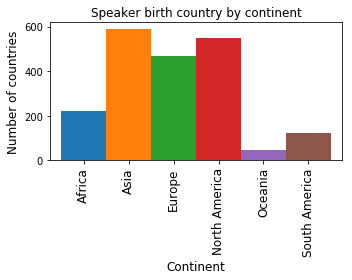

In [167]:
# plot continent count

continent_count.plot(kind='bar', figsize=(5, 4), width=1)
plt.title("Speaker birth country by continent")
plt.ylabel("Number of countries", fontsize=12)
plt.xlabel("Continent", fontsize=12)
plt.xticks(fontsize=12)
plt.tight_layout()
plt.savefig("speaker_continent.png")
plt.show()

In [109]:
speech_csv['country'].unique()

array(['Senegal', 'Cameroon', 'Nigeria', 'Haiti', 'United States',
       'Jamaica', 'Liberia', 'Nicaragua', 'South Africa', 'India',
       'Sri Lanka', 'Switzerland', 'Timor-Leste', 'Papua New Guinea',
       'Ivory Coast', 'Ghana', 'Kosovo', 'Albania', 'Morocco', 'Ethiopia',
       'Saudi Arabia', 'Egypt', 'Lebanon', 'Qatar', 'Tunisia', 'Iraq',
       'Jordan', 'Kuwait', 'Syria', 'United Arab Emirates',
       'Israel (Occupied Territory)', 'Israel', 'Algeria', 'Yemen',
       'Bahrain', 'Libya', 'Oman', 'United Kingdom', 'Sudan', 'Armenia',
       'Iran', 'Republic Of Georgia', 'Russia', 'Azerbaijan', 'Guinea',
       'China', 'Mali', 'Spain', 'Germany', 'Belarus', 'Bangladesh',
       'Zambia', 'Bosnia And Herzegovina', 'Bulgaria', 'Myanmar',
       'Northern Mariana Islands', 'Chile', 'Philippines', 'Malawi',
       'Croatia', 'Czech Republic', 'Denmark', 'Afghanistan',
       'Netherlands', 'Belgium', 'South Korea', 'Canada',
       'Us Virgin Islands', 'Malaysia', 'Australia', 

## College Degrees

In [36]:
# Load in data 

degrees = pd.read_csv("./dat11syd/data/kaggle/degrees-that-pay-back.csv")

In [42]:
degrees.set_index('Undergraduate Major', inplace=True)

In [161]:
degrees['Mid-Career Median Salary'] = degrees['Mid-Career Median Salary'].str.replace("$", "")
degrees['Mid-Career Median Salary'] = degrees['Mid-Career Median Salary'].str.replace(",", "").astype(float)
degrees['Starting Median Salary'] = degrees['Starting Median Salary'].str.replace("$", "")
degrees['Starting Median Salary'] = degrees['Starting Median Salary'].str.replace(",", "").astype(float)

In [164]:
degrees.sort_values('Mid-Career Median Salary', ascending=False)

,Starting Median Salary,Mid-Career Median Salary,Percent change from Starting to Mid-Career Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
Undergraduate Major,,,,,,,
Chemical Engineering,63200.0,107000.0,69.3,"$71,900.00","$87,300.00","$143,000.00","$194,000.00"
Computer Engineering,61400.0,105000.0,71.0,"$66,100.00","$84,100.00","$135,000.00","$162,000.00"
Electrical Engineering,60900.0,103000.0,69.1,"$69,300.00","$83,800.00","$130,000.00","$168,000.00"
Aerospace Engineering,57700.0,101000.0,75.0,"$64,300.00","$82,100.00","$127,000.00","$161,000.00"
Economics,50100.0,98600.0,96.8,"$50,600.00","$70,600.00","$145,000.00","$210,000.00"
Physics,50300.0,97300.0,93.4,"$56,000.00","$74,200.00","$132,000.00","$178,000.00"
Computer Science,55900.0,95500.0,70.8,"$56,000.00","$74,900.00","$122,000.00","$154,000.00"
Industrial Engineering,57700.0,94700.0,64.1,"$57,100.00","$72,300.00","$132,000.00","$173,000.00"
Mechanical Engineering,57900.0,93600.0,61.7,"$63,700.00","$76,200.00","$120,000.00","$163,000.00"


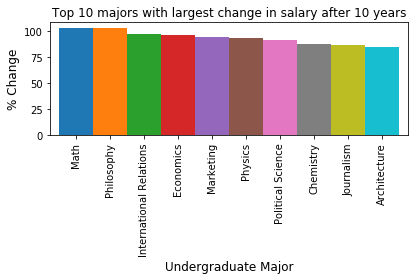

In [165]:
# plot top10 % change in salary of from starting to mid-career

top10_degrees = degrees.sort_values('Percent change from Starting to Mid-Career Salary', ascending=False).head(10)

top10_degrees['Percent change from Starting to Mid-Career Salary'].plot(kind="bar", figsize=(6, 4), width=1)
plt.title("Top 10 majors with largest change in salary after 10 years")
plt.ylabel("% Change", fontsize=12)
plt.xlabel("Undergraduate Major", fontsize=12)
plt.tight_layout()
plt.savefig("degree_percent_change.png")
plt.show()

## Homelessness in the US

In [68]:
# Load in data 

homeless = pd.read_csv("./dat11syd/data/kaggle/2007-2016-Homelessnewss-USA.csv")

In [69]:
# Parse dates

homeless['Year'] = pd.to_datetime(homeless['Year'])
homeless.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86529 entries, 0 to 86528
Data columns (total 6 columns):
Year          86529 non-null datetime64[ns]
State         86529 non-null object
CoC Number    86529 non-null object
CoC Name      86529 non-null object
Measures      86529 non-null object
Count         86529 non-null object
dtypes: datetime64[ns](1), object(5)
memory usage: 4.0+ MB


In [70]:
# COnvert count to numeric

homeless['Count'] = homeless['Count'].str.replace(",", "").astype(int)

In [136]:
homeless.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86529 entries, 0 to 86528
Data columns (total 6 columns):
Year          86529 non-null datetime64[ns]
State         86529 non-null object
CoC Number    86529 non-null object
CoC Name      86529 non-null object
Measures      86529 non-null object
Count         86529 non-null int64
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 4.0+ MB


In [133]:
homeless_total = homeless.loc[homeless['Measures'] == 'Total Homeless']

In [149]:
youth_2016 = homeless.loc[(homeless['Measures'] == 'Homeless Unaccompanied Youth (Under 25)') & (homeless['Year'] == '2016')]

In [153]:
youth_2016.groupby('State')['Count'].sum().sort_values(ascending=False)

State
CA    11222
NY     2889
FL     2094
NV     1672
TX     1309
WA     1307
OR     1175
PA      868
MN      730
GA      725
MI      725
IL      719
MO      658
CO      653
OH      622
AZ      589
NJ      533
NC      497
TN      416
OK      410
LA      408
MA      374
IN      365
WI      337
VA      322
HI      309
MD      279
SC      266
AL      254
NE      238
KY      220
DC      211
AR      201
NM      188
ME      177
AK      173
PR      163
IA      160
UT      150
ID      130
CT      119
MT      100
WV       95
KS       86
MS       85
NH       80
SD       77
ND       74
VT       71
RI       64
DE       51
WY       31
VI        8
GU        7
Name: Count, dtype: int64

In [74]:
# Value counts for measures

homeless_NY['Measures'].value_counts()

Sheltered Homeless People in Families                          265
Homeless Individuals                                           265
Chronically Homeless Individuals                               265
Unsheltered Chronically Homeless Individuals                   265
Unsheltered Homeless                                           265
Sheltered Homeless Individuals                                 265
Homeless People in Families                                    265
Unsheltered Homeless People in Families                        265
Unsheltered Homeless Individuals                               265
Total Homeless                                                 265
Sheltered Homeless                                             265
Sheltered Chronically Homeless Individuals                     265
Sheltered Chronically Homeless People in Families              159
Chronically Homeless                                           159
Unsheltered Homeless Veterans                                 

In [76]:
# Subset to total homeless

total_homeless_NY = homeless.loc[(homeless['State'] == 'NY') & (homeless['Measures'] == 'Total Homeless')]

In [81]:
# Plot total homeless in NY over time

total_homeless_NY.set_index('Year', inplace=True)

Year
2007-12-31    62601
2008-12-31    61125
2009-12-31    61067
2010-12-31    65606
2011-12-31    63445
2012-12-31    69566
2013-12-31    77430
2014-12-31    80590
2015-12-31    88250
2016-12-31    86352
Freq: A-DEC, Name: Count, dtype: int64

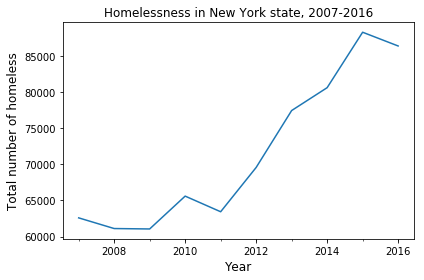

In [166]:
annual = total_homeless_NY['Count'].resample('A').sum() 
annual.plot(kind='line', figsize=(6, 4))
plt.title("Homelessness in New York state, 2007-2016")
plt.xlabel("Year", fontsize=12)
plt.ylabel("Total number of homeless", fontsize=12)
plt.tight_layout()
plt.savefig("total_homeless_NY.png")
plt.show()